In [2]:
### Global utils
class bcolors:
    HEADER = '\033[95m'
    OKBLUE = '\033[94m'
    OKCYAN = '\033[96m'
    OKGREEN = '\033[92m'
    WARNING = '\033[93m'
    FAIL = '\033[91m'
    ENDC = '\033[0m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'

## Multiplicative sensitivity of measure r
A morphism is a tool that enables the generation of repetitive strings.

Given an alphabet, each letter of the alphabet is associated with a word, and it is closed under the operation of concatenation between words.

For example, given the binary alphabet {a, b}, consider the morphism 𝜇 that maps:
- a to the word aab
- b to the word bb.
 
This means that the morphism 𝜇(𝑎𝑎𝑏) = 𝜇(𝑎)𝜇(𝑎)𝜇(𝑏) = 𝑎𝑎𝑏𝑎𝑎𝑏𝑏𝑏.

Define a function that computes the BWT-multiplicative sensitivity of the morphism, defined as 𝑀𝑆𝜇(𝑛) = 𝑚𝑎𝑥{𝑤∈Σ𝑛}(𝑟(𝜇(𝑤))/ 𝑟(𝑤) )
where 𝑟 is the number of equal-letter runs produced by the BWT (Burrows-Wheeler Transform) and Σ𝑛 is the set of all words over the
alphabet Σ = {𝑎, 𝑏} having length 𝑛.

Graphically describe the behavior of 𝑀𝑆𝜇(𝑛) as 𝑛 ≥ 2 varies


In [3]:
import itertools


def morphism_mu(w: str, mu_map: dict):
    """Define the morphism μ: Σ → Σ* such that:
       μ(a) = "aab"
       μ(b) = "bb" """
    output = ""
    for char in w:
        # print(char, mu_map[char])
        output += mu_map[char]
    return "".join(mu_map[char] for char in w)


def find_equal_letter_runs(bwt_result: str):
    """Identify and return the equal-letter runs in the BWT result"""
    runs = []
    n = len(bwt_result)

    if n == 0:
        return runs

    current_char = bwt_result[0]
    run_start = 0

    for i in range(1, n):
        if bwt_result[i] != current_char:
            # Append the run as a tuple (character, start_index, length)
            # if i - run_start > 1:
            runs.append((current_char, run_start, i - run_start))
            current_char = bwt_result[i]
            run_start = i

    # Append the last run
    # if n - run_start > 1:
    runs.append((current_char, run_start, n - run_start))

    return len(runs)


def bwt(T: str):
    """Compute BWT using sorting of cyclic rotations"""
    n = len(T)

    rotations = [T[i:] + T[:i] for i in range(n)]
    rotations_sorted = sorted(rotations)

    # for r in rotations_sorted:
    #    print(f"{r[:-1]}{bcolors.OKGREEN}{r[-1]}{bcolors.ENDC}")

    I = rotations_sorted.index(T)
    # compute BWT by taking last character from each sorted rotation
    bwt_result = "".join(rotation[-1] for rotation in rotations_sorted)
    return bwt_result


def MS_mu(n: int, alphabet: list[str], mu_map: dict, debug: bool = False):
    """Compute the BWT-multiplicative sensitivity MS_μ(n)"""
    # Generate all possible words of length n over the alphabet {a, b}
    words = ["".join(w) for w in itertools.product(alphabet, repeat=n)]
    if debug:
        print(f"{bcolors.OKGREEN}Generated words:", words, bcolors.ENDC)

    ratios = []

    for w in words:
        if debug:
            print(f"Word {words.index(w)}:", w)
        # Apply the morphism μ
        mu_w = morphism_mu(w, mu_map)
        if debug:
            print("After Morfism_mu:", mu_w)

        # Compute the BWT of the original and transformed word
        bwt_w = bwt(w)
        if debug:
            print("BWT applied to original word:", bwt_w)
        bwt_mu_w = bwt(mu_w)
        if debug:
            print("BWT applied to mu_w word:", bwt_mu_w)

        # Count the number of runs
        r_w = find_equal_letter_runs(bwt_w)
        if debug:
            print("Equal letter runs for BWT applied to original word:", r_w)

        r_mu_w = find_equal_letter_runs(bwt_mu_w)
        if debug:
            print("Equal letter runs for BWT applied to mu_w word:", r_mu_w, end="\n\n")

        # Compute the multiplicative sensitivity MS_𝜇(𝑤) = (𝑟(𝜇(𝑤))/ 𝑟(𝑤)
        if r_w > 0:
            ratios.append(r_mu_w / r_w)

    return ratios
    

## Analysis

N: 2
Generated words: ['aa', 'ab', 'ba', 'bb'] 
Word 0: aa
After Morfism_mu: abab
BWT applied to original word: aa
BWT applied to mu_w word: bbaa
Equal letter runs for BWT applied to original word: 1
Equal letter runs for BWT applied to mu_w word: 2

Word 1: ab
After Morfism_mu: aba
BWT applied to original word: ba
BWT applied to mu_w word: baa
Equal letter runs for BWT applied to original word: 2
Equal letter runs for BWT applied to mu_w word: 2

Word 2: ba
After Morfism_mu: aab
BWT applied to original word: ba
BWT applied to mu_w word: baa
Equal letter runs for BWT applied to original word: 2
Equal letter runs for BWT applied to mu_w word: 2

Word 3: bb
After Morfism_mu: aa
BWT applied to original word: bb
BWT applied to mu_w word: aa
Equal letter runs for BWT applied to original word: 1
Equal letter runs for BWT applied to mu_w word: 1

max ratios 2.0 

N: 3
max ratios 2.0 

N: 4
max ratios 2.0 

N: 5
max ratios 2.0 

N: 6
max ratios 2.0 

N: 7
max ratios 2.0 

N: 8
max ratios 2.0 


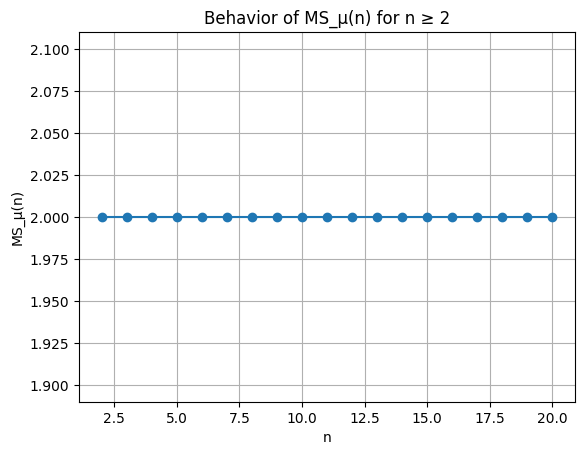

In [4]:
import matplotlib.pyplot as plt

alphabet = ["a", "b"]
mu_map = {"a": "ab", "b": "a"}
n_values = range(2, 21)

ms_values = []
debug_log = True
for n in n_values:
    if n > 2:
        debug_log = False

    print("N:", n)
    ratios = MS_mu(n, alphabet, mu_map, debug=debug_log)
    print("max ratios", max(ratios), "\n")
    ms_values.append(max(ratios))


plt.plot(n_values, ms_values, marker="o")
plt.xlabel("n")
plt.ylabel("MS_μ(n)")
plt.title("Behavior of MS_μ(n) for n ≥ 2")
plt.grid(True)
plt.show()

Il rapporto di sensibilità r(μ(w))/r(w) misura quanto può aumentare il numero di sequenze di lettere uguali nella Burrows-Wheeler Transform (BWT) dopo aver applicato il morfismo μ rispetto alla parola originale.

#### Per n=2 il valore di MS_μ(n) è intorno a 2
  
Questo indica che, per le parole di lunghezza minima (con due simboli), il rapporto massimo tra equal-letter-runs nella parola trasformata e nella parola originale è 2

#### Per n>=3, il valore di MS_μ(n) si stabilizza rapidamente a 3

Ciò significa che, man mano che la lunghezza delle parole aumenta, il rapporto massimo di sensibilità moltiplicativa BWT non aumenta ulteriormente e rimane costante a 3

Il valore di 3 indica che, nel peggiore dei casi, il numero di equal-letter-runs nella parola trasformata può essere fino a 3 volte maggiore rispetto alla parola originale dopo aver applicato la BWT.

Il fatto che si stabilizza a 3 implica che, oltre una certa lunghezza della parola, applicare il morfismo μ non provoca un aumento sproporzionato nel numero di equal-letter-runs dopo la BWT.

In [5]:
alphabet = ["a", "b"]
mu_map = {"a": "aab", "b": "bb"}
n = 2

ratios = MS_mu(n, alphabet, mu_map, debug=True)
print("max ratio", max(ratios))

Generated words: ['aa', 'ab', 'ba', 'bb'] 
Word 0: aa
After Morfism_mu: aabaab
BWT applied to original word: aa
BWT applied to mu_w word: bbaaaa
Equal letter runs for BWT applied to original word: 1
Equal letter runs for BWT applied to mu_w word: 2

Word 1: ab
After Morfism_mu: aabbb
BWT applied to original word: ba
BWT applied to mu_w word: babba
Equal letter runs for BWT applied to original word: 2
Equal letter runs for BWT applied to mu_w word: 4

Word 2: ba
After Morfism_mu: bbaab
BWT applied to original word: ba
BWT applied to mu_w word: babba
Equal letter runs for BWT applied to original word: 2
Equal letter runs for BWT applied to mu_w word: 4

Word 3: bb
After Morfism_mu: bbbb
BWT applied to original word: bb
BWT applied to mu_w word: bbbb
Equal letter runs for BWT applied to original word: 1
Equal letter runs for BWT applied to mu_w word: 1

max ratio 2.0
